# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('job_acceptance_dataset.csv')

data

,age,experience,gpa,degree,position,expected_salary,result
0,29.0,7,2.71,bachelor,secretary,19500,accept
1,29.0,4,NaN,bachelor,secretary,20500,accept
2,27.0,2,3.40,doctorate,accountant,43000,reject
3,33.0,11,3.25,bachelor,NaN,39000,reject
4,34.0,9,3.22,master,engineer,46500,reject
...,...,...,...,...,...,...,...
85,30.0,9,2.95,doctorate,accountant,48500,accept
86,28.0,6,3.31,master,engineer,45500,NaN
87,24.0,1,3.48,master,secretary,21500,accept
88,NaN,2,3.88,bachelor,accountant,32000,reject


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              89 non-null     float64
 1   experience       90 non-null     int64  
 2   gpa              89 non-null     float64
 3   degree           90 non-null     object 
 4   position         89 non-null     object 
 5   expected_salary  90 non-null     int64  
 6   result           89 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.0+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,expected_salary
count,86.000000,86.000000,86.000000,86.000000
mean,27.872093,3.186047,3.280581,32209.302326
std,4.375860,3.197468,0.511957,9194.456487
min,21.000000,0.000000,2.520000,15000.000000
25%,24.000000,0.250000,2.890000,25500.000000
50%,28.000000,2.000000,3.280000,32000.000000
75%,31.750000,5.000000,3.567500,38500.000000
max,35.000000,13.000000,6.000000,54500.000000


### 3.2.2. Remove Outliers

In [6]:
_filter = data['gpa'] <= 4.00
data = data[_filter]

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'result'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = ['age', 'experience', 'gpa', 'expected_salary']
categorical_feature = ['degree', 'position']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [12]:
ordinal_feature = ['degree']
nominal_feature = ['position']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['bachelor', 'master', 'doctorate'], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
clf = SVC()

## 6.2. Train Model

In [23]:
clf.fit(X_train_scaled, y_train)

SVC()

## 6.3. Model's Weight & Bias

In [24]:
clf.dual_coef_

array([[-0.90739756, -1.        , -0.77585938, -1.        , -0.17954556,
        -0.33776938, -1.        , -1.        , -0.64152775, -0.08867474,
        -1.        , -1.        , -1.        , -1.        , -0.17263459,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.72264303, -0.18428532, -0.1373802 , -1.        ,
        -0.06171599, -1.        , -1.        , -0.34146166, -0.28522068,
        -0.16388416,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ]])

In [25]:
clf.intercept_

array([-0.46946467])

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [27]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

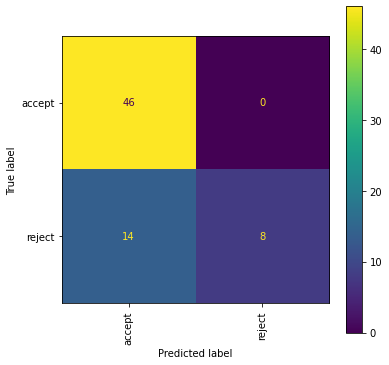

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [29]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [30]:
print('accuracy =', report['accuracy'])

accuracy = 0.7941176470588235


In [31]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
accept,0.766667,1.000000,0.867925,46.000000
reject,1.000000,0.363636,0.533333,22.000000
accuracy,0.794118,0.794118,0.794118,0.794118
macro avg,0.883333,0.681818,0.700629,68.000000
weighted avg,0.842157,0.794118,0.759674,68.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

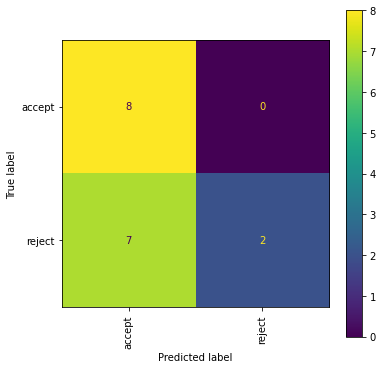

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [33]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [34]:
print('accuracy =', report['accuracy'])

accuracy = 0.5882352941176471


In [35]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
accept,0.533333,1.000000,0.695652,8.000000
reject,1.000000,0.222222,0.363636,9.000000
accuracy,0.588235,0.588235,0.588235,0.588235
macro avg,0.766667,0.611111,0.529644,17.000000
weighted avg,0.780392,0.588235,0.519879,17.000000


# 9. Save Model

In [36]:
import pickle

In [37]:
pickle.dump((clf, 
             ordinal_encoder, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature),  open('support_vector_classification_model.pickle', 'wb'))